Date: 2021/11/12
## Step 1 Generate the BA network

In [25]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

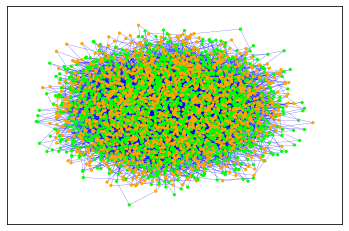

In [40]:
# generate a BA network with 4000 nodes and <k> = 2m = 4
ba = nx.barabasi_albert_graph(4000, 2, seed=666)
x = np.random.randint(0, 2, 4000)
color = []

for x_ in x:
    if x_ == 0:
        color.append('#FFA500')
    else:
        color.append('#00FF00')

nx.draw_networkx(ba, node_size=5, node_color=color, with_labels=False, width=0.2, edge_color='b')
plt.show()

In [41]:
# get the adjacency matrix
# adj = ba.adjacency()
# adj[0]


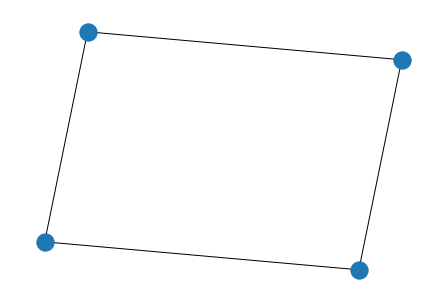

In [22]:
# number of nodes
N = 4
# new node has m links
m = 2
# nodes
nodes = [i for i in range(N)]
# get adj matrix
ba_s = nx.barabasi_albert_graph(N, m, seed=666)
# get the neighbours for each vert [(0, [1, 2]), (1, [0, 3]), (2, [0, 3]), (3, [1, 2])]
adj = [(n, list(nbrdict.keys())) for n, nbrdict in ba_s.adjacency()]
# get the degrees [(0, [1, 2]), (1, [0, 3]), (2, [0, 3]), (3, [1, 2])]
degrees = list(ba_s.degree())

# randomly generate the C and D
identity = dict()
for i in range(N):
    identity[i] = np.random.randint(0, 2)  # 0 - C, 1 - D

In [ ]:
b = 1.2
def cal_gain(node):
    """
    calculate gain for the given node
    :param node: the node i
    """
    neighbours = adj[node][1]
    gain = 0
    idi = identity[node]
    for n in neighbours:
        idj = identity[n]
        if idi == idj and idi == 0:
            gain += 0
        elif idi == 1 and idj == 0:
            gain += b
    return gain

gains = dict()
def update(nodei, nodej):
    """
    compare nodei's gain with its neighbour nodej, and find out
    how to udpate nodei's od
    :param nodei: nodei
    :param nodej: nodej
    :return:
    """
    if gains[nodei] < gains[nodej]:
        beta = 1 / (max(degrees[nodei], degrees[nodei])*b)
        dice = np.random.rand()
        if dice <= beta:
            identity[nodei] = identity[nodej]

def choose_neighbor(nodei):
    """
    choose the node j for the node compare the gain
    :param nodei: the node we need to find a neighbour for
    :return: the neighbour chosen randomly
    """
    neighbors = adj[nodei][1]
    dice = np.random.randint(0, len(neighbors))
    return neighbors[dice]


In [42]:
test = {'a':1, 'b':2}
def change():
    a = np.random.randint(0, 2)
    if a == 0:
        test['a'] = 10
    else:
        test['b'] = 100
change()
print(test)

{'a': 1, 'b': 100}


0
